# Standard GLM

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Simulation parameters
n_simulations = 1000
n_train = 50
x0 = 0.5
true_function = lambda x: 2 * x + np.sin(2 * np.pi * x)
noise_std = 0.1

# Degrees to test
degrees = [1, 2, 3, 4, 10, 20, 25, 100]
results = {}

# Set random seed for reproducibility
np.random.seed(42)

# Run simulations
for degree in degrees:
    predictions = []

    for _ in range(n_simulations):
        # Generate training data
        x_train = np.random.uniform(0, 1, n_train)
        y_train = true_function(x_train) + np.random.normal(0, noise_std, n_train)

        # Polynomial feature expansion
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(x_train.reshape(-1, 1))
        
        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_poly, y_train)

        # Predict at x0
        x0_poly = poly.transform(np.array([[x0]]))
        y_pred = model.predict(x0_poly)[0]
        predictions.append(y_pred)

    predictions = np.array(predictions)
    f_true = true_function(x0)
    avg_pred = np.mean(predictions)
    bias_sq = (f_true - avg_pred) ** 2
    variance = np.var(predictions)
    total_error = bias_sq + variance + noise_std**2

    results[degree] = {
        'avg_prediction': avg_pred,
        'bias_sq': bias_sq,
        'variance': variance,
        'total_error': total_error,
        'prediction_range': (np.min(predictions), np.max(predictions))
    }



In [9]:
results

{1: {'avg_prediction': 1.0004929887515897,
  'bias_sq': 2.4303790919370407e-07,
  'variance': 0.004194591094362614,
  'total_error': 0.01419483413227181,
  'prediction_range': (0.7960571922777282, 1.1902445035987632)},
 2: {'avg_prediction': 0.9970235423389652,
  'bias_sq': 8.859300207934229e-06,
  'variance': 0.010345963680571514,
  'total_error': 0.020354822980779452,
  'prediction_range': (0.6603981656909931, 1.294003909873067)},
 3: {'avg_prediction': 0.9990289066676927,
  'bias_sq': 9.430222600520715e-07,
  'variance': 0.0007198455344754735,
  'total_error': 0.010720788556735528,
  'prediction_range': (0.9104627962972479, 1.0841252238507324)},
 4: {'avg_prediction': 0.9995608058877631,
  'bias_sq': 1.9289146822376962e-07,
  'variance': 0.001085202218699528,
  'total_error': 0.011085395110167753,
  'prediction_range': (0.8959821763606087, 1.1053700358175644)},
 10: {'avg_prediction': 0.9984318034211763,
  'bias_sq': 2.4592405098349826e-06,
  'variance': 0.001698085655625297,
  'tot

# Ridge 

In [10]:
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression

# Simulation parameters
n_simulations = 1000
n = 20
x = np.linspace(0, 1, n).reshape(-1, 1)
true_intercept = 1
true_coef = 2
noise_std = 1

# Lambda values to evaluate
lambdas = [0, 1, 5]
results_ridge = {}

# Set random seed for reproducibility
np.random.seed(42)

# Run simulations
for lmbd in lambdas:
    coef_estimates = []

    for _ in range(n_simulations):
        y = true_intercept + true_coef * x.flatten() + np.random.normal(0, noise_std, n)
        
        if lmbd == 0:
            model = LinearRegression()
        else:
            model = Ridge(alpha=lmbd, fit_intercept=True)
        
        model.fit(x, y)
        coef_estimates.append(model.coef_[0])
    
    coef_estimates = np.array(coef_estimates)
    mean_estimate = np.mean(coef_estimates)
    bias_sq = (true_coef - mean_estimate) ** 2
    variance = np.var(coef_estimates)
    mse = bias_sq + variance

    results_ridge[lmbd] = {
        "E[β̂₁]": mean_estimate,
        "Bias²": bias_sq,
        "Var(β̂₁)": variance,
        "MSE": mse
    }

results_ridge


{0: {'E[β̂₁]': 1.999190204201128,
  'Bias²': 6.55769235870693e-07,
  'Var(β̂₁)': 0.549423065844884,
  'MSE': 0.5494237216141199},
 1: {'E[β̂₁]': 1.3096892008215177,
  'Bias²': 0.4765289994624349,
  'Var(β̂₁)': 0.23671137170453452,
  'MSE': 0.7132403711669694},
 5: {'E[β̂₁]': 0.5378497103057389,
  'Bias²': 2.1378834696530116,
  'Var(β̂₁)': 0.04156011975266193,
  'MSE': 2.1794435894056736}}

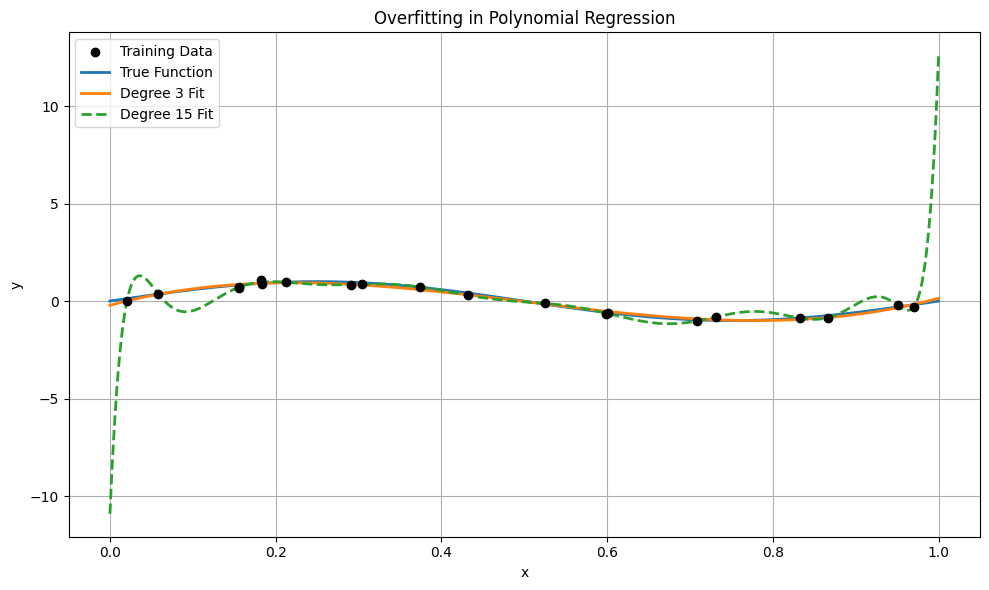

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate dense x values for plotting

# Simulation for overfitting demonstration
from sklearn.pipeline import make_pipeline

# Parameters
n_points = 20
degree_low = 3
degree_high = 15
noise_std = 0.1

# Generate data
np.random.seed(42)
x = np.sort(np.random.uniform(0, 1, n_points))
y_true = np.sin(2 * np.pi * x)
y = y_true + np.random.normal(0, noise_std, n_points)
x = x.reshape(-1, 1)

# Fit low-degree polynomial
model_low = make_pipeline(PolynomialFeatures(degree_low), LinearRegression())
model_low.fit(x, y)
coefs_low = model_low.named_steps['linearregression'].coef_

# Fit high-degree polynomial
model_high = make_pipeline(PolynomialFeatures(degree_high), LinearRegression())
model_high.fit(x, y)
coefs_high = model_high.named_steps['linearregression'].coef_

# Pad coefficients to equal length
max_len = max(len(coefs_low), len(coefs_high))
coefs_low_padded = np.pad(coefs_low, (0, max_len - len(coefs_low)))
coefs_high_padded = np.pad(coefs_high, (0, max_len - len(coefs_high)))

# Create DataFrame
coefs_df = pd.DataFrame({
    f'Degree {degree_low}': coefs_low_padded,
    f'Degree {degree_high}': coefs_high_padded
})
coefs_df.index.name = 'Coefficient Index'


x_plot = np.linspace(0, 1, 500).reshape(-1, 1)
y_true_plot = np.sin(2 * np.pi * x_plot).flatten()

# Predictions
y_pred_low = model_low.predict(x_plot)
y_pred_high = model_high.predict(x_plot)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Training Data', zorder=5)
plt.plot(x_plot, y_true_plot, label='True Function', linewidth=2)
plt.plot(x_plot, y_pred_low, label=f'Degree {degree_low} Fit', linewidth=2)
plt.plot(x_plot, y_pred_high, label=f'Degree {degree_high} Fit', linewidth=2, linestyle='--')
plt.title('Overfitting in Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
coefs_df

,Degree 3,Degree 15
Coefficient Index,,
0,0.000000,0.000000e+00
1,11.541208,9.980535e+02
2,-33.479087,-3.079007e+04
3,22.298157,4.732306e+05
4,0.000000,-4.307542e+06
5,0.000000,2.564557e+07
6,0.000000,-1.063211e+08
7,0.000000,3.203538e+08
8,0.000000,-7.229623e+08
